In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

    # Logistic Regression is twist On regresion for categorical where instead of solving mean logistics Solve probability of class y 
        log(E(y|x)) = Bo + summ(BjXj)
    # The odds ration of probability p is measure of how many times more likely it is more than the inverse \
        odss ratio =P/1-P 
    # Using odd ratio the sigmoid function is obtained by assigning y=e^( Bo+B1+x) p(x) = 1/1+e^-(Bo+B1x)
    # p=1/1+e^-xTo
    # P(y=1|x=x) = o-(o^Tx)
    #  P(y=0|x=x) = 1-o-(o^Tx)
    # CALCULATE LOG
        LL(o)=summ(i=0 to n)[y^i-o-(o^T.x^i)]x^(1)
    # differentiate the above wrt to o which will contain the actual and predicted values fropm the data

In [2]:
dataset=pd.read_csv(r"D:\SEM 6\ML LAB\PROBLEMS\1. Logisti regression\framingham.csv")
dataset

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  

[4238 rows x 16 columns]

<Axes: >

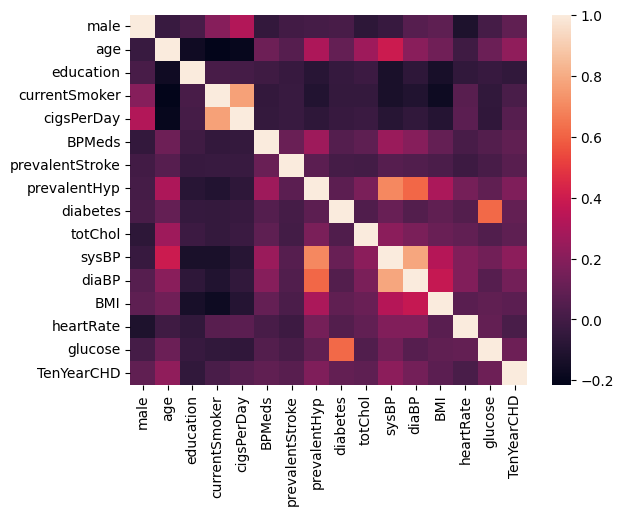

In [3]:
sns.heatmap(dataset.corr())

In [4]:
for i in dataset:
    print(i," has these unique values:",dataset[i].unique())

male  has these unique values: [1 0]
age  has these unique values: [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
education  has these unique values: [ 4.  2.  1.  3. nan]
currentSmoker  has these unique values: [0 1]
cigsPerDay  has these unique values: [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BPMeds  has these unique values: [ 0.  1. nan]
prevalentStroke  has these unique values: [0 1]
prevalentHyp  has these unique values: [0 1]
diabetes  has these unique values: [0 1]
totChol  has these unique values: [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326

Text(0.5, 0, 'male')

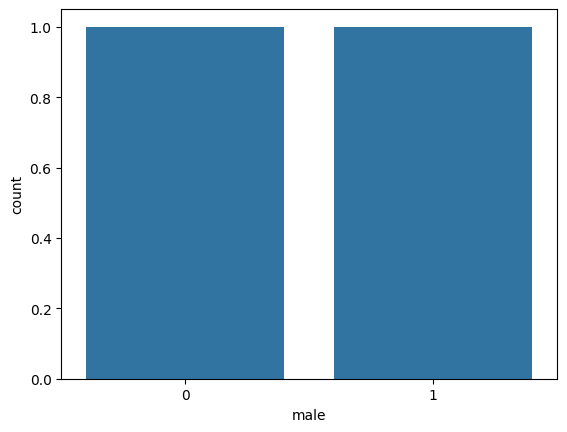

In [5]:
sns.countplot(dataset["male"].unique())
plt.xlabel("male")

In [6]:
print(dataset.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [7]:
dataset.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

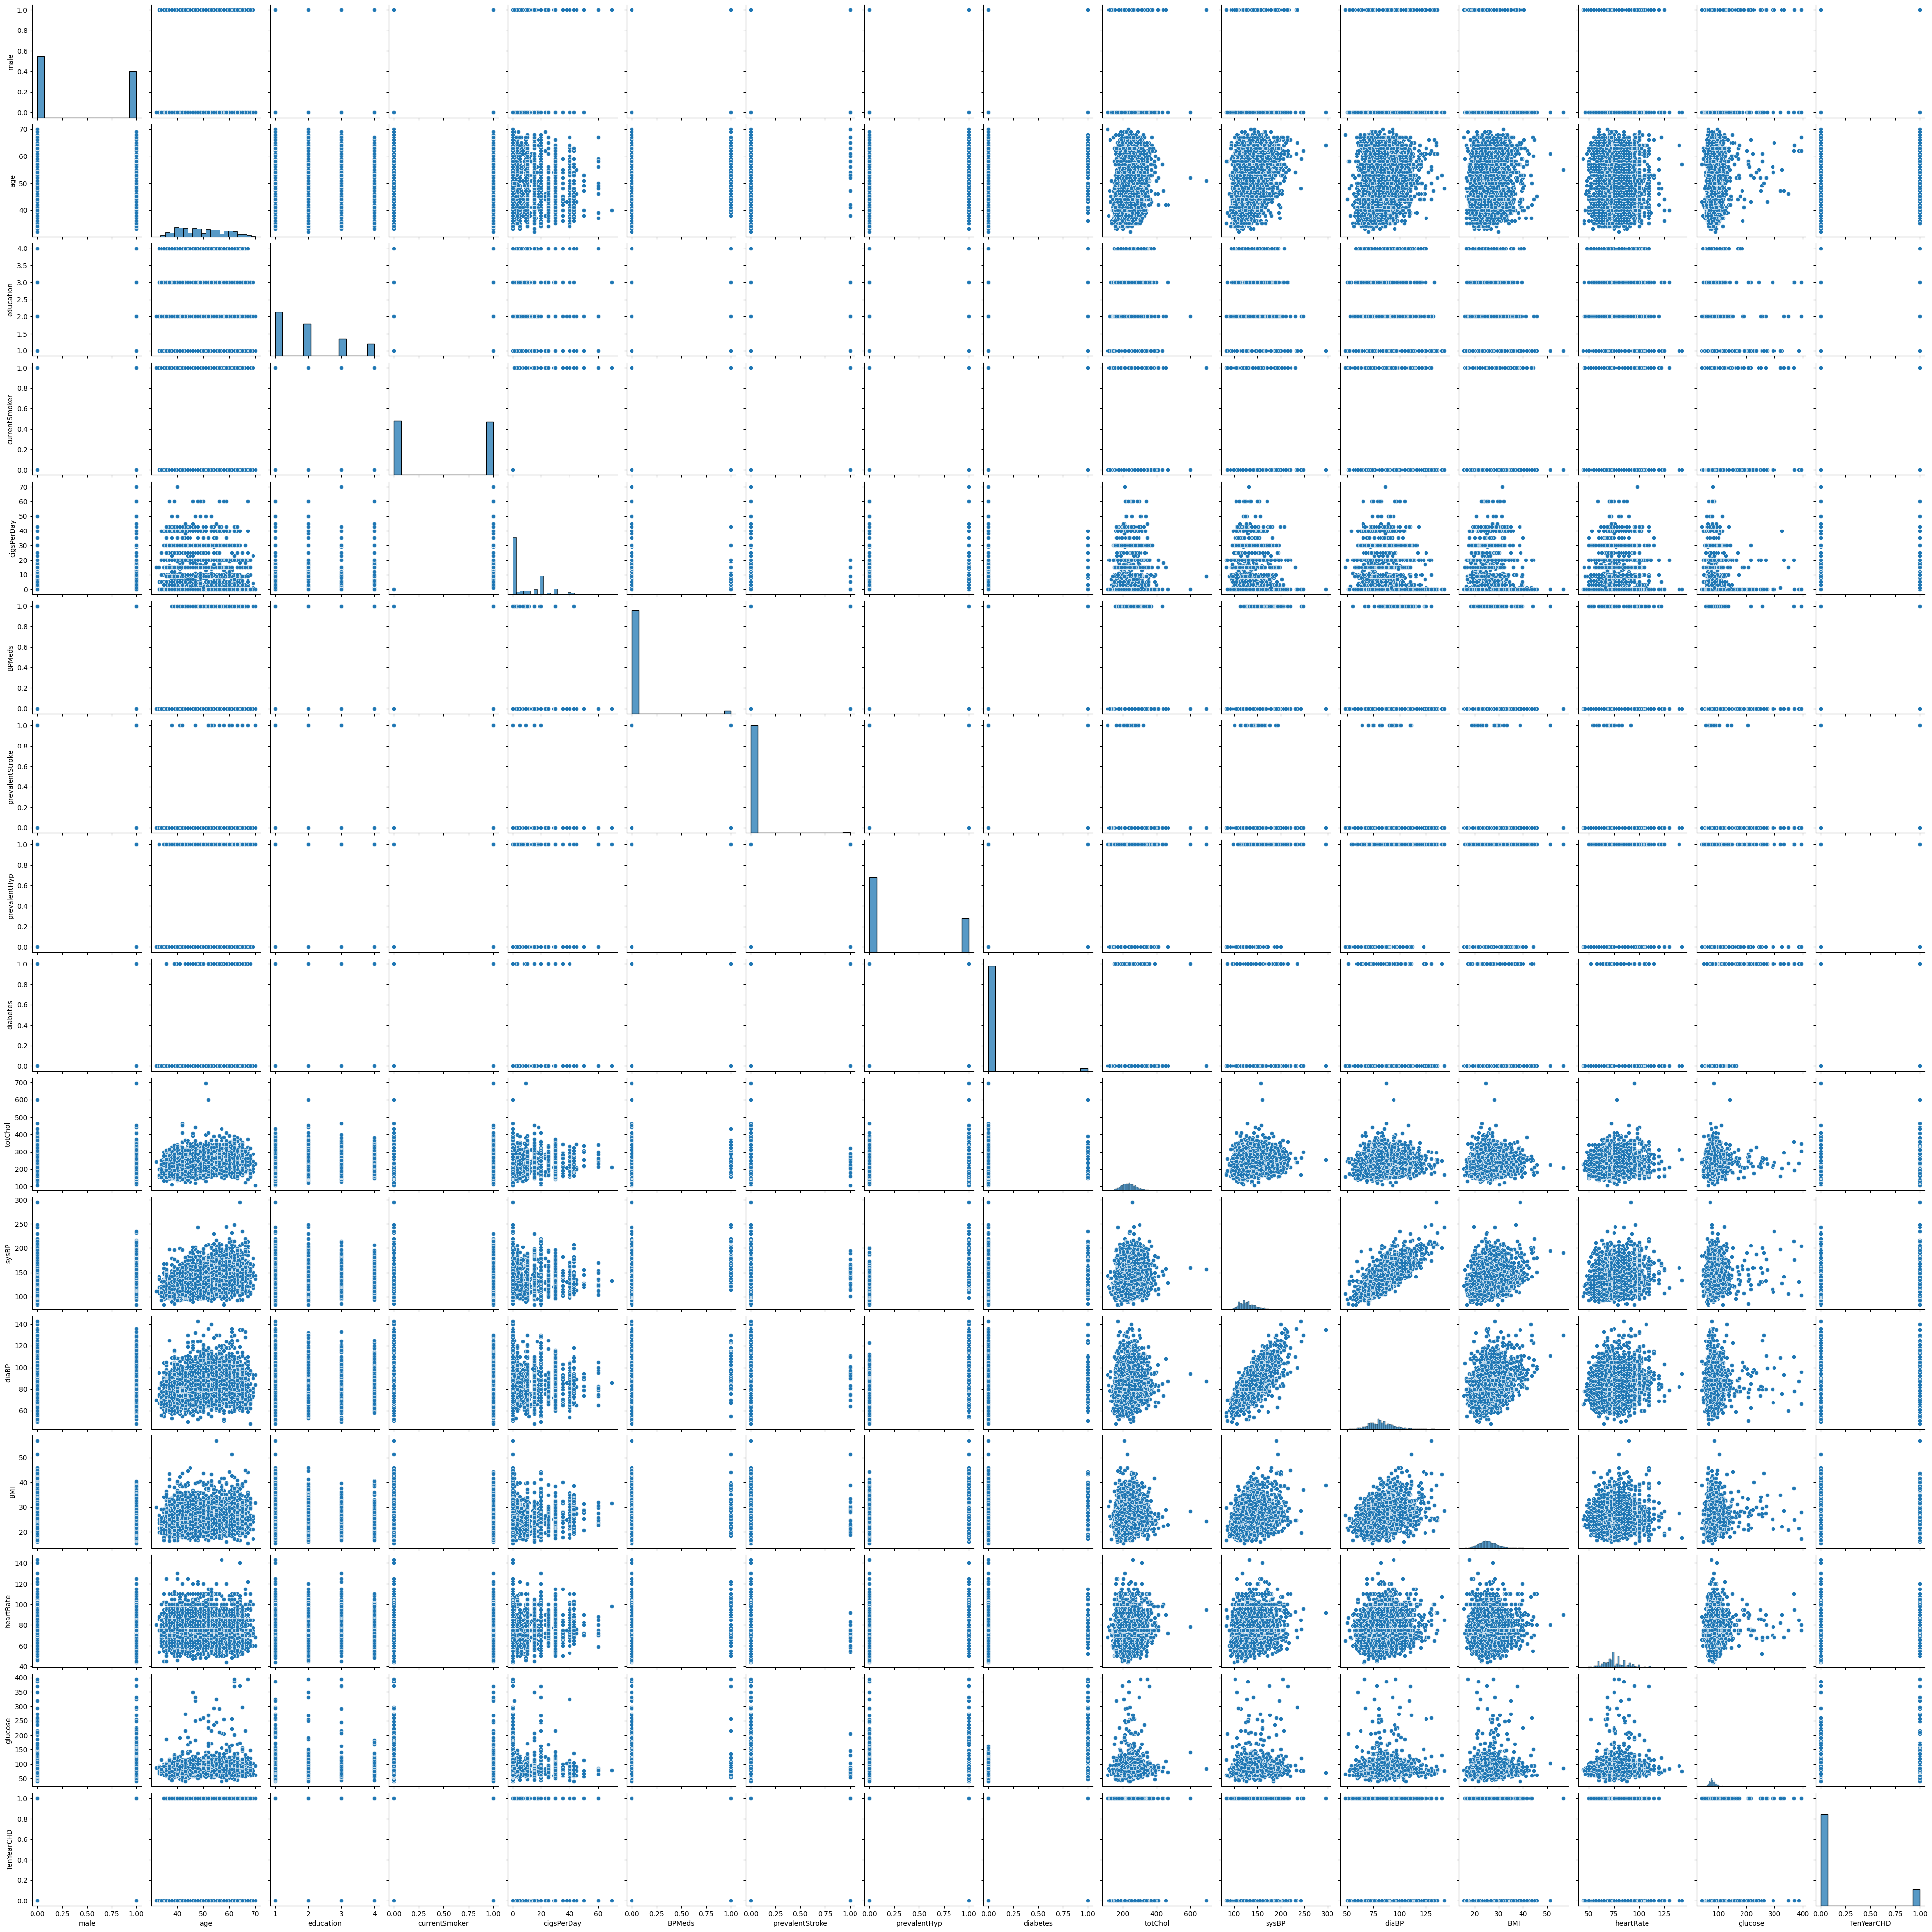

In [8]:
sns.pairplot(dataset)
plt.show()

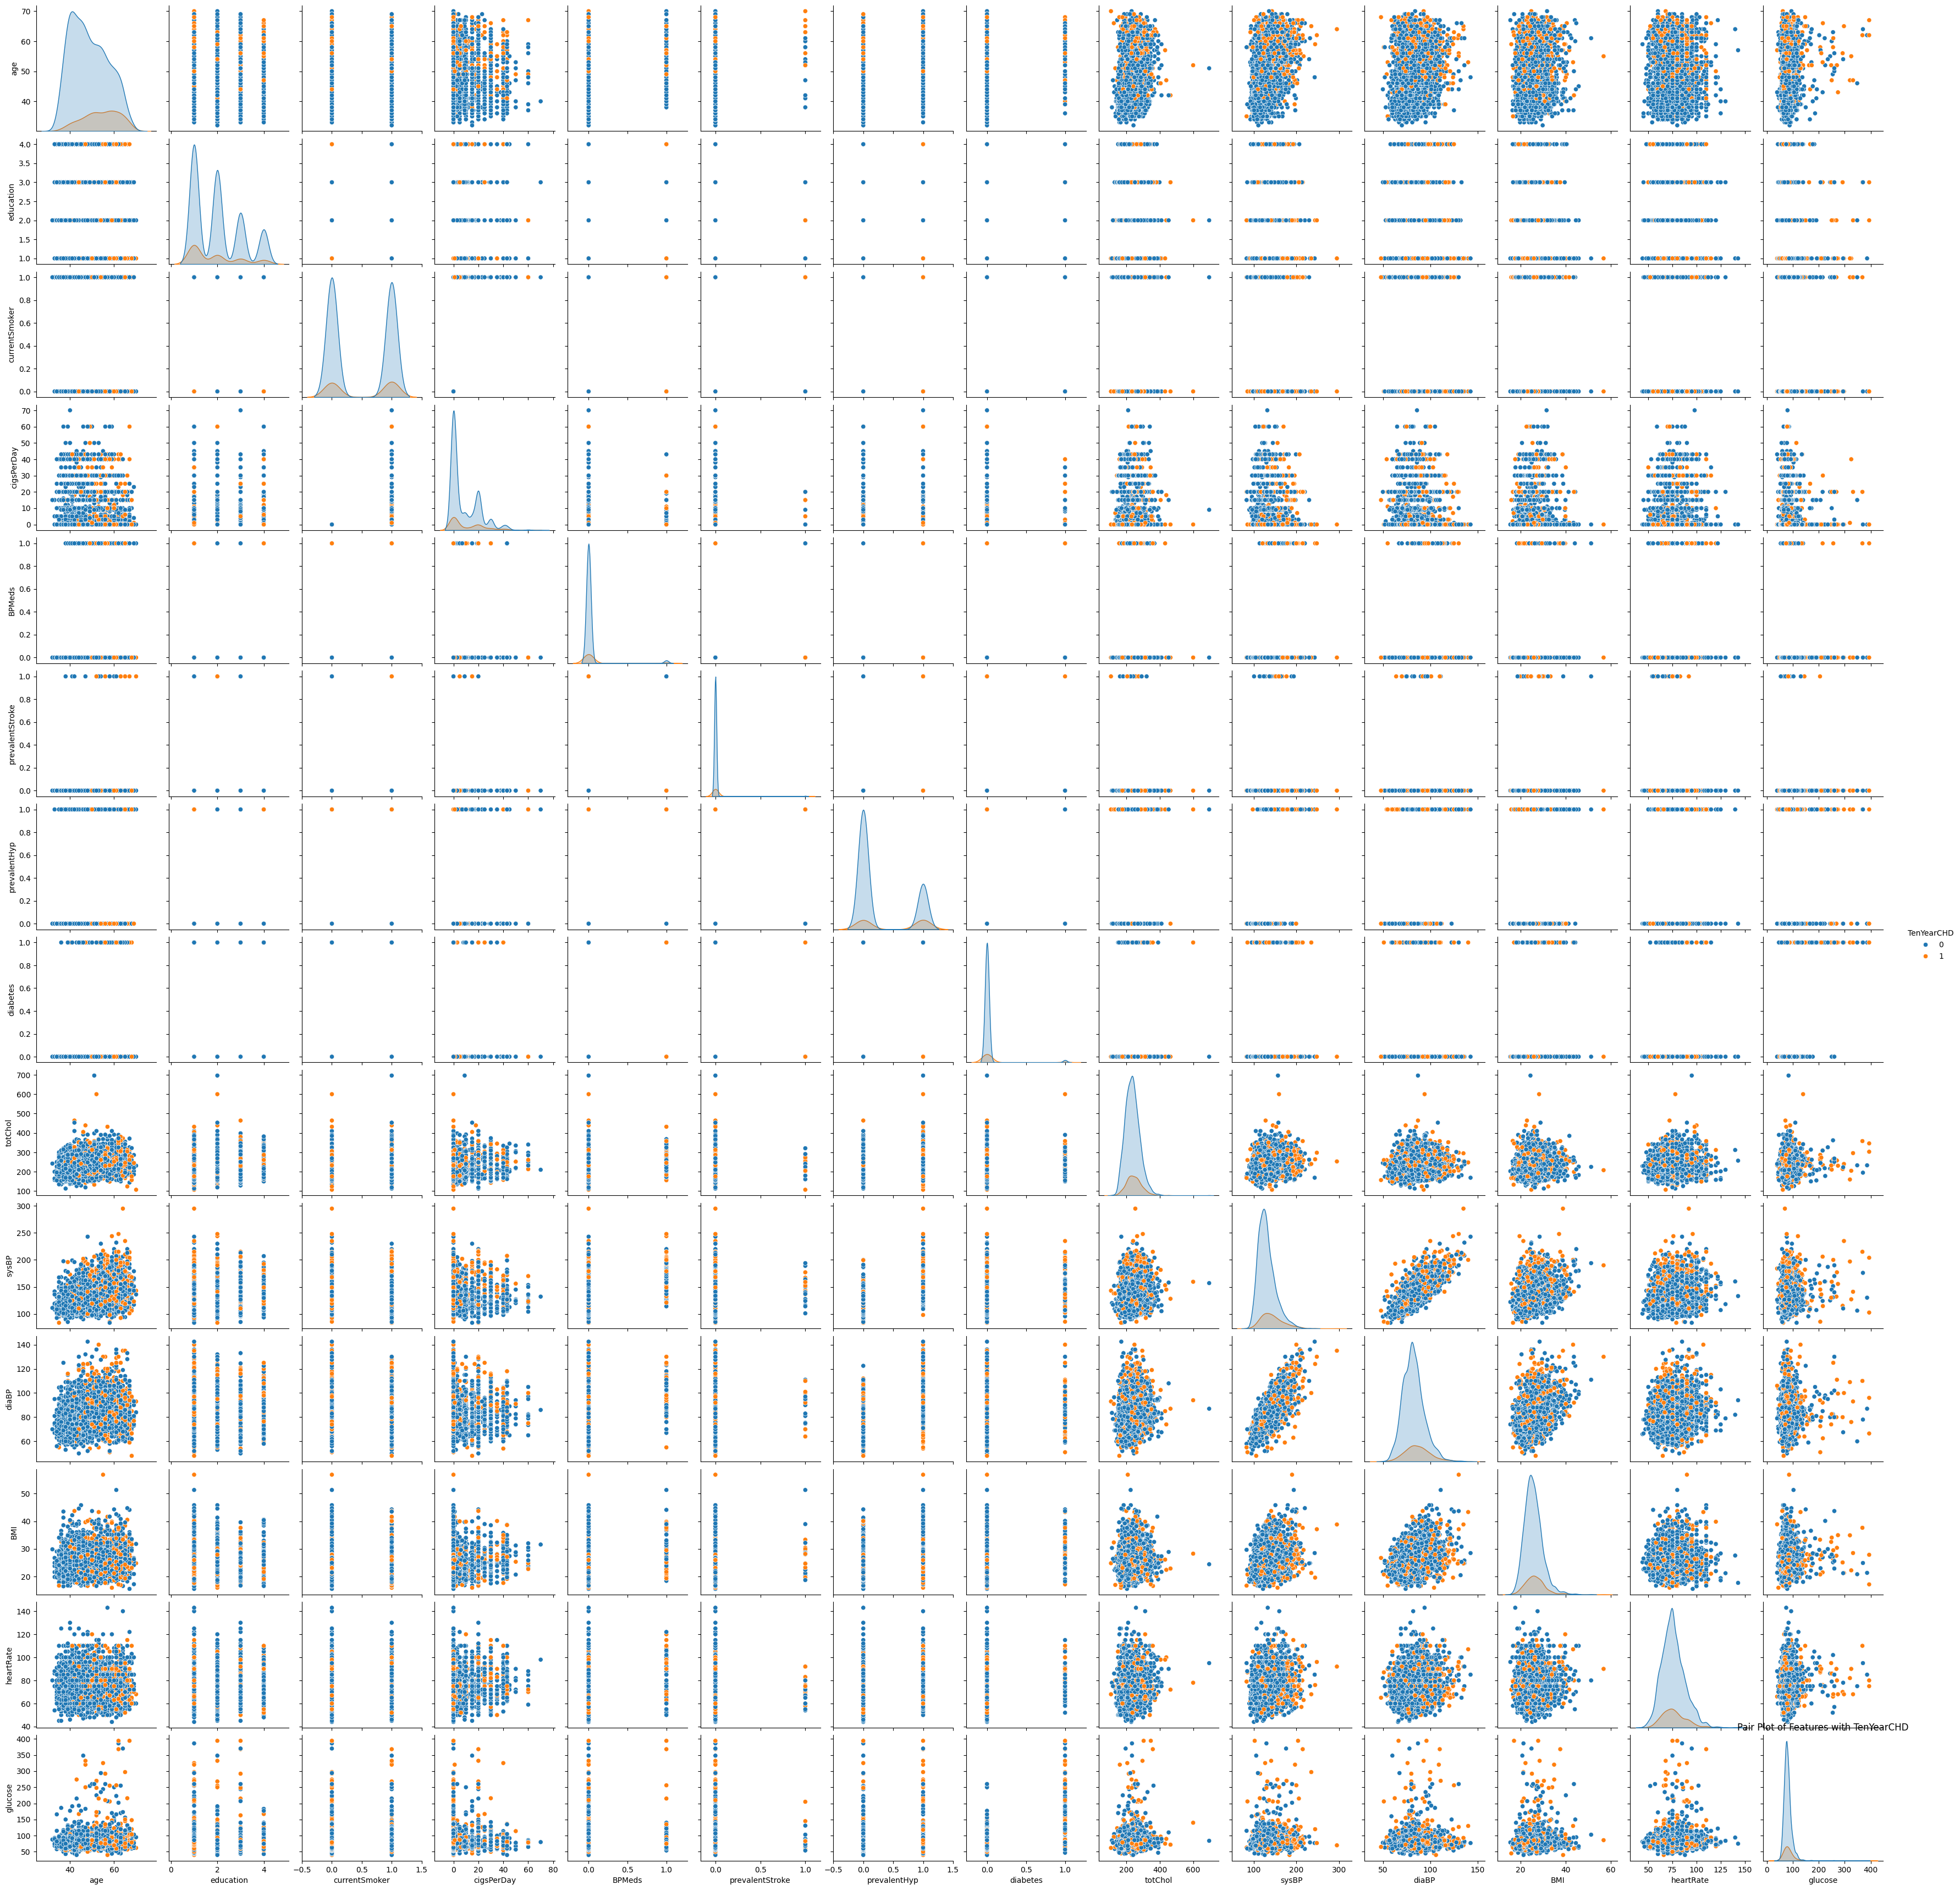

In [32]:
# Visualizing the Training set results
sns.pairplot(dataset, hue='TenYearCHD', vars=['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 
                                              'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 
                                              'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
plt.title('Pair Plot of Features with TenYearCHD')
plt.show()


In [9]:
dataset.fillna(method ='ffill', inplace = True)

In [20]:
# Drop rows with missing values
dataset.dropna(inplace=True)

In [21]:
# Features and target variable
X = dataset.iloc[:, 1:-1].values  # Excluding 'male' and 'TenYearCHD'
y = dataset.iloc[:, -1].values

In [22]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [24]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Visualising the Training set results
X_set, y_set = X_train, y_train

# Create meshgrid for all 14 features
feature_ranges = [(X_set[:, i].min() - 1, X_set[:, i].max() + 1, 0.01) for i in range(X_set.shape[1])]
X = np.empty((int(np.prod([rng[1]-rng[0] for rng in feature_ranges])), X_set.shape[1]))
i = 0
for rng in feature_ranges:
    x = np.arange(*rng)
    X[:, i] = x
    i += 1

# Predict the training set results
Z = classifier.predict(X)

# Reshape the prediction for contour plot
Z = Z.reshape(X1.shape)

# Plot the contour plot
plt.contourf(X[:, 0], X[:, 1], Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X[:, 0].min(), X[:, 0].max())
plt.ylim(X[:, 1].min(), X[:, 1].max())

# Plot the actual points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(colors=('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(colors=('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

MemoryError: Unable to allocate 902. TiB for an array with shape (8853788379802, 14) and data type float64

In [41]:
# Visualising the Test set results
X_set, y_set = X_test, y_test

# Create meshgrid for all 14 features
feature_ranges = [(X_set[:, i].min() - 1, X_set[:, i].max() + 1, 0.01) for i in range(X_set.shape[1])]
X = np.empty((int(np.prod([rng[1]-rng[0] for rng in feature_ranges])), X_set.shape[1]))
i = 0
for rng in feature_ranges:
    x = np.arange(*rng)
    X[:, i] = x
    i += 1

# Predict the test set results
Z = classifier.predict(X)

# Reshape the prediction for contour plot
Z = Z.reshape(X1.shape)

# Plot the contour plot
plt.contourf(X[:, 0], X[:, 1], Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X[:, 0].min(), X[:, 0].max())
plt.ylim(X[:, 1].min(), X[:, 1].max())

# Plot the actual points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

MemoryError: Unable to allocate 724. TiB for an array with shape (7105770783772, 14) and data type float64

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

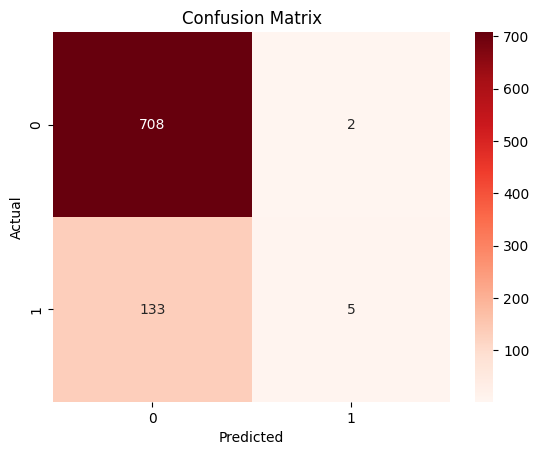

In [27]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Reds', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Evaluation metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.8408018867924528
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.71      0.04      0.07       138

    accuracy                           0.84       848
   macro avg       0.78      0.52      0.49       848
weighted avg       0.82      0.84      0.78       848



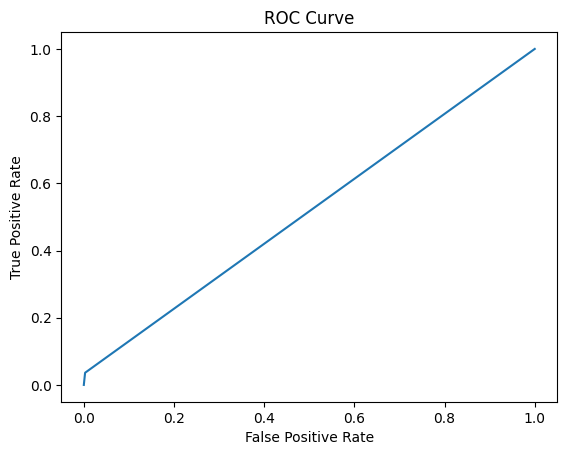

In [29]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [30]:

# Model AUC score
print(f'Model AUC score: {roc_auc_score(y_test, y_pred)}')

Model AUC score: 0.5167074913247601
